In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Circadian

In [41]:
cIHC_metadata = pd.read_csv('../data/CircadianIHC/Microbiome/circadianIHC_metadata_cleaned.txt', 
                            sep='\t', usecols=['sample_name', 'mouse_number', 'exposure_type', 'zt'], index_col=0)
cIHC_metadata.head()

,zt,exposure_type,mouse_number
sample_name,,,
11548.132.133.1a,2,Air,133
11548.132.133.2a,6,Air,133
11548.132.133.3a,10,Air,133
11548.132.133.4a,14,Air,133
11548.132.133.5a,18,Air,133


In [42]:
cIHC_wUF_dm = pd.read_csv('../data/CircadianIHC/Microbiome/CircadianIHC-wUF-distance-matrix.tsv', sep='\t', index_col=0)
cIHC_wUF_dm.head()

,11548.A25.126.5a,11548.132.133.5a,11548.A31.132.3a,11548.A29.130.5a,11548.A26.127.1a,11548.A30.131.1a,11548.A26.127.4a,11548.A24.125.2a,11548.A30.131.4a,11548.A27.128.4a,...,11548.A29.130.2a,11548.132.133.2a,11548.A25.126.2a,11548.A31.132.4a,11548.A27.128.6a,11548.A31.132.1a,11548.A27.128.3a,11548.A24.125.5a,11548.A30.131.3a,11548.A26.127.3a
11548.A25.126.5a,0.000000,0.186538,0.162573,0.088567,0.195179,0.082325,0.237604,0.389104,0.225851,0.118308,...,0.200061,0.251013,0.400154,0.181158,0.133479,0.171033,0.265336,0.060691,0.179337,0.264867
11548.132.133.5a,0.186538,0.000000,0.290283,0.151622,0.273414,0.187325,0.232543,0.497539,0.217255,0.235590,...,0.298842,0.292213,0.553915,0.289385,0.246850,0.306645,0.379314,0.192049,0.229456,0.263488
11548.A31.132.3a,0.162573,0.290283,0.000000,0.188501,0.216317,0.144421,0.278983,0.268480,0.293638,0.159717,...,0.220587,0.277098,0.305191,0.193274,0.135367,0.153830,0.183007,0.153816,0.209320,0.302641
11548.A29.130.5a,0.088567,0.151622,0.188501,0.000000,0.230151,0.102221,0.281558,0.411411,0.268341,0.166035,...,0.221558,0.287728,0.460111,0.219659,0.181248,0.210376,0.313788,0.089823,0.220294,0.307873
11548.A26.127.1a,0.195179,0.273414,0.216317,0.230151,0.000000,0.190328,0.130493,0.344067,0.187042,0.102363,...,0.092766,0.101189,0.336149,0.104005,0.116928,0.101761,0.164898,0.199435,0.079025,0.097743


In [43]:
named_cIHC_wUF_dm = pd.merge(cIHC_metadata, cIHC_wUF_dm, left_index=True, right_index=True)
named_cIHC_wUF_dm.head()

,zt,exposure_type,mouse_number,11548.A25.126.5a,11548.132.133.5a,11548.A31.132.3a,11548.A29.130.5a,11548.A26.127.1a,11548.A30.131.1a,11548.A26.127.4a,...,11548.A29.130.2a,11548.132.133.2a,11548.A25.126.2a,11548.A31.132.4a,11548.A27.128.6a,11548.A31.132.1a,11548.A27.128.3a,11548.A24.125.5a,11548.A30.131.3a,11548.A26.127.3a
11548.132.133.1a,2,Air,133,0.185405,0.300808,0.181752,0.234090,0.097401,0.150599,0.182627,...,0.113321,0.111507,0.283330,0.126190,0.084263,0.071502,0.111656,0.178909,0.125272,0.167736
11548.132.133.2a,6,Air,133,0.251013,0.292213,0.277098,0.287728,0.101189,0.252780,0.134970,...,0.138290,0.000000,0.354980,0.143614,0.168714,0.140109,0.173667,0.265703,0.106789,0.101385
11548.132.133.3a,10,Air,133,0.379873,0.368507,0.419002,0.422368,0.236504,0.390581,0.186412,...,0.273839,0.149302,0.419538,0.276483,0.307994,0.282443,0.274546,0.401647,0.242048,0.163299
11548.132.133.5a,18,Air,133,0.186538,0.000000,0.290283,0.151622,0.273414,0.187325,0.232543,...,0.298842,0.292213,0.553915,0.289385,0.246850,0.306645,0.379314,0.192049,0.229456,0.263488
11548.132.133.6a,22,Air,133,0.136146,0.066865,0.249203,0.114118,0.223600,0.148203,0.216310,...,0.247375,0.241356,0.498926,0.248523,0.196332,0.257354,0.329154,0.146346,0.180246,0.241683


In [44]:
named_cIHC_wUF_dm['combined'] = named_cIHC_wUF_dm['mouse_number'].map(str) + '_' + named_cIHC_wUF_dm['exposure_type'].map(str) + "_" + named_cIHC_wUF_dm['zt'].map(str)
named_cIHC_wUF_dm.head()

,zt,exposure_type,mouse_number,11548.A25.126.5a,11548.132.133.5a,11548.A31.132.3a,11548.A29.130.5a,11548.A26.127.1a,11548.A30.131.1a,11548.A26.127.4a,...,11548.132.133.2a,11548.A25.126.2a,11548.A31.132.4a,11548.A27.128.6a,11548.A31.132.1a,11548.A27.128.3a,11548.A24.125.5a,11548.A30.131.3a,11548.A26.127.3a,combined
11548.132.133.1a,2,Air,133,0.185405,0.300808,0.181752,0.234090,0.097401,0.150599,0.182627,...,0.111507,0.283330,0.126190,0.084263,0.071502,0.111656,0.178909,0.125272,0.167736,133_Air_2
11548.132.133.2a,6,Air,133,0.251013,0.292213,0.277098,0.287728,0.101189,0.252780,0.134970,...,0.000000,0.354980,0.143614,0.168714,0.140109,0.173667,0.265703,0.106789,0.101385,133_Air_6
11548.132.133.3a,10,Air,133,0.379873,0.368507,0.419002,0.422368,0.236504,0.390581,0.186412,...,0.149302,0.419538,0.276483,0.307994,0.282443,0.274546,0.401647,0.242048,0.163299,133_Air_10
11548.132.133.5a,18,Air,133,0.186538,0.000000,0.290283,0.151622,0.273414,0.187325,0.232543,...,0.292213,0.553915,0.289385,0.246850,0.306645,0.379314,0.192049,0.229456,0.263488,133_Air_18
11548.132.133.6a,22,Air,133,0.136146,0.066865,0.249203,0.114118,0.223600,0.148203,0.216310,...,0.241356,0.498926,0.248523,0.196332,0.257354,0.329154,0.146346,0.180246,0.241683,133_Air_22


In [45]:
named_cIHC_wUF_dm.drop(columns=['zt', 'exposure_type', 'mouse_number'], inplace=True)

In [46]:
named2_cIHC_wUF_dm = named_cIHC_wUF_dm.set_index('combined')

In [47]:
Named_cIHC_wUF_dm = named_cIHC_wUF_dm[['combined']].copy()
Named_cIHC_wUF_dm.head()

,combined
11548.132.133.1a,133_Air_2
11548.132.133.2a,133_Air_6
11548.132.133.3a,133_Air_10
11548.132.133.5a,133_Air_18
11548.132.133.6a,133_Air_22


In [48]:
named3_cIHC_wUF_dm = pd.merge(named2_cIHC_wUF_dm.T, Named_cIHC_wUF_dm, left_index=True, right_index=True)
named4_cIHC_wUF_dm = named3_cIHC_wUF_dm.set_index('combined')
named4_cIHC_wUF_dm

,133_Air_2,133_Air_6,133_Air_10,133_Air_18,133_Air_22,125_IHC_2,125_IHC_6,125_IHC_10,125_IHC_14,125_IHC_18,...,131_Air_10,131_Air_14,131_Air_18,131_Air_22,132_Air_2,132_Air_6,132_Air_10,132_Air_14,132_Air_18,132_Air_22
combined,,,,,,,,,,,,,,,,,,,,,
126_IHC_18,0.185405,0.251013,0.379873,0.186538,0.136146,0.403091,0.389104,0.401236,0.318104,0.060691,...,0.179337,0.225851,0.214889,0.153073,0.171033,0.285805,0.162573,0.181158,0.094661,0.122738
133_Air_18,0.300808,0.292213,0.368507,0.000000,0.066865,0.534982,0.497539,0.520239,0.444009,0.192049,...,0.229456,0.217255,0.091710,0.067915,0.306645,0.297965,0.290283,0.289385,0.119689,0.116674
132_Air_10,0.181752,0.277098,0.419002,0.290283,0.249203,0.301548,0.268480,0.374752,0.249547,0.153816,...,0.209320,0.293638,0.343959,0.261229,0.153830,0.305027,0.000000,0.193274,0.193972,0.217692
130_Air_18,0.234090,0.287728,0.422368,0.151622,0.114118,0.449117,0.411411,0.444303,0.367005,0.089823,...,0.220294,0.268341,0.209844,0.122378,0.210376,0.322943,0.188501,0.219659,0.075809,0.082278
127_IHC_2,0.097401,0.101189,0.236504,0.273414,0.223600,0.337405,0.344067,0.273851,0.210689,0.199435,...,0.079025,0.187042,0.292615,0.252328,0.101761,0.163037,0.216317,0.104005,0.217951,0.263113
131_Air_2,0.150599,0.252780,0.390581,0.187325,0.148203,0.363408,0.326278,0.358633,0.279708,0.054580,...,0.178800,0.232267,0.244185,0.155612,0.164846,0.306054,0.144421,0.221695,0.130396,0.135060
127_IHC_14,0.182627,0.134970,0.186412,0.232543,0.216310,0.446443,0.450927,0.335684,0.270710,0.256524,...,0.111659,0.155560,0.243274,0.270754,0.204399,0.131289,0.278983,0.170256,0.252943,0.305691
125_IHC_6,0.297639,0.362915,0.427685,0.497539,0.454951,0.069248,0.000000,0.329353,0.217811,0.348819,...,0.376895,0.459107,0.548558,0.472599,0.308110,0.415900,0.268480,0.382619,0.438526,0.445204
131_Air_14,0.244943,0.202975,0.252324,0.217255,0.202041,0.463102,0.459107,0.378435,0.357254,0.247488,...,0.134388,0.000000,0.208588,0.253891,0.230142,0.211579,0.293638,0.218550,0.233075,0.284635


In [49]:
named5_cIHC_wUF_dm = named4_cIHC_wUF_dm.filter(regex='IHC')
named6_cIHC_wUF_dm = named5_cIHC_wUF_dm.T.filter(regex='Air')
named6_cIHC_wUF_dm.shape

(23, 23)

In [50]:
wufdm = named6_cIHC_wUF_dm.copy()
wufdm2 = wufdm.stack().reset_index()
wufdm2.columns = ['IHC','Air','Value']
wufdm2

,IHC,Air,Value
0,125_IHC_2,133_Air_18,0.534982
1,125_IHC_2,132_Air_10,0.301548
2,125_IHC_2,130_Air_18,0.449117
3,125_IHC_2,131_Air_2,0.363408
4,125_IHC_2,131_Air_14,0.463102
...,...,...,...
524,128_IHC_22,130_Air_6,0.138026
525,128_IHC_22,133_Air_6,0.168714
526,128_IHC_22,132_Air_14,0.138742
527,128_IHC_22,132_Air_2,0.104558


In [51]:
wufdm2['timepoints'] = wufdm2['IHC'].str.split('_').str[-1] + "_" + wufdm2['Air'].str.split('_').str[-1]
wufdm2.timepoints.unique()

array(['2_18', '2_10', '2_2', '2_14', '2_22', '2_6', '6_18', '6_10',
       '6_2', '6_14', '6_22', '6_6', '10_18', '10_10', '10_2', '10_14',
       '10_22', '10_6', '14_18', '14_10', '14_2', '14_14', '14_22',
       '14_6', '18_18', '18_10', '18_2', '18_14', '18_22', '18_6',
       '22_18', '22_10', '22_2', '22_14', '22_22', '22_6'], dtype=object)

In [141]:
zt_tps = ['2_2', '6_6', '10_10', '14_14', '18_18', '22_22']

In [66]:
wufdm2['mice'] = wufdm2['IHC'].str.split('_').str[0] + "_" + wufdm2['Air'].str.split('_').str[0]
wufdm2.mice.unique()

array(['125_133', '125_132', '125_130', '125_131', '126_133', '126_132',
       '126_130', '126_131', '127_133', '127_132', '127_130', '127_131',
       '128_133', '128_132', '128_130', '128_131'], dtype=object)

In [67]:
combos = ['125_130', '125_131', '125_132', '125_133',
       '126_130', '126_131', '126_132', '126_133',
       '127_130', '127_131', '127_132', '127_133',
       '128_130', '128_131', '128_132', '128_133']

In [68]:
wufdm3 = wufdm2.loc[wufdm2['timepoints'].isin(zt_tps)]
wufdm3

,IHC,Air,Value,timepoints,mice
3,125_IHC_2,131_Air_2,0.363408,2_2,125_131
6,125_IHC_2,133_Air_2,0.291366,2_2,125_133
7,125_IHC_2,130_Air_2,0.217494,2_2,125_130
21,125_IHC_2,132_Air_2,0.306901,2_2,125_132
32,125_IHC_6,132_Air_6,0.415900,6_6,125_132
...,...,...,...,...,...
498,128_IHC_18,132_Air_18,0.103179,18_18,128_132
511,128_IHC_22,132_Air_22,0.208419,22_22,128_132
518,128_IHC_22,130_Air_22,0.228281,22_22,128_130
519,128_IHC_22,133_Air_22,0.196332,22_22,128_133


In [69]:
wufdm4 = wufdm3.copy()
wufdm4['ZT'] = wufdm4['timepoints'].str.split('_').str[-1]
wufdm4['Controls'] = wufdm4['Air'].str.split('_').str[0]
wufdm4['Experimentals'] = wufdm4['IHC'].str.split('_').str[0]
wufdm4

,IHC,Air,Value,timepoints,mice,ZT,Controls,Experimentals
3,125_IHC_2,131_Air_2,0.363408,2_2,125_131,2,131,125
6,125_IHC_2,133_Air_2,0.291366,2_2,125_133,2,133,125
7,125_IHC_2,130_Air_2,0.217494,2_2,125_130,2,130,125
21,125_IHC_2,132_Air_2,0.306901,2_2,125_132,2,132,125
32,125_IHC_6,132_Air_6,0.415900,6_6,125_132,6,132,125
...,...,...,...,...,...,...,...,...
498,128_IHC_18,132_Air_18,0.103179,18_18,128_132,18,132,128
511,128_IHC_22,132_Air_22,0.208419,22_22,128_132,22,132,128
518,128_IHC_22,130_Air_22,0.228281,22_22,128_130,22,130,128
519,128_IHC_22,133_Air_22,0.196332,22_22,128_133,22,133,128


In [70]:
wufdm4.Value.mean()

0.23251422906805547

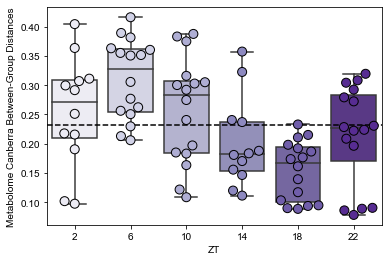

In [83]:
ax = sns.boxplot(x="ZT", y="Value", palette="Purples",
                 data=wufdm4, order=['2', '6', '10', '14', '18', '22'])
ax = sns.swarmplot(x="ZT", y="Value", palette="Purples", edgecolor='k', linewidth=1, size=9,
                   data=wufdm4, order=['2', '6', '10', '14', '18', '22'])
plt.ylabel('Metabolome Canberra Between-Group Distances')
ax.axhline(0.23251422906805547, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_wUF_dist_boxplot.svg', dpi=300, bbox_inches="tight")

In [74]:
from scipy.stats import wilcoxon

In [75]:
from itertools import combinations

In [76]:
for key in list(combinations(wufdm4.ZT.unique(), 2)):
    x = wufdm4[wufdm4["ZT"] == key[0]].Value.values
    y = wufdm4[wufdm4["ZT"] == key[1]].Value.values
    if len(x) == len(y):
        w, p = wilcoxon(x, y)
        print("Combination", key)
        print(p, w)
        print("____________________")
    else:
        t = set(wufdm4[wufdm4["ZT"] == key[0]].mice)
        w = set(wufdm4[wufdm4["ZT"] == key[1]].mice)
        q = list(t.intersection(w))
        
        newdf = wufdm4.loc[wufdm4['mice'].isin(q)]
        
        xx = newdf[newdf["ZT"] == key[0]].Value.values
        yy = newdf[newdf["ZT"] == key[1]].Value.values
        
        w, p = wilcoxon(xx, yy)
        print("Combination", key)
        print(p, w)
        print("____________________")


Combination ('2', '6')
0.00244140625 3.0
____________________
Combination ('2', '10')
0.2333984375 23.0
____________________
Combination ('2', '14')
0.0771484375 16.0
____________________
Combination ('2', '18')
0.02685546875 11.0
____________________
Combination ('2', '22')
0.423828125 28.0
____________________
Combination ('6', '10')
0.004180908203125 15.0
____________________
Combination ('6', '14')
0.00048828125 0.0
____________________
Combination ('6', '18')
3.0517578125e-05 0.0
____________________
Combination ('6', '22')
0.00628662109375 17.0
____________________
Combination ('10', '14')
0.0771484375 16.0
____________________
Combination ('10', '18')
0.002685546875 13.0
____________________
Combination ('10', '22')
0.252227783203125 45.0
____________________
Combination ('14', '18')
0.17626953125 21.0
____________________
Combination ('14', '22')
0.30126953125 25.0
____________________
Combination ('18', '22')
0.0506591796875 30.0
____________________


In [77]:
from scipy.stats import mannwhitneyu

In [78]:
for key in list(combinations(wufdm4.ZT.unique(), 2)):
    x = wufdm4[wufdm4["ZT"] == key[0]].Value.values
    y = wufdm4[wufdm4["ZT"] == key[1]].Value.values
    if len(x) == len(y):
        w, p = mannwhitneyu(x, y)
        print("Combination", key)
        print(p, w)
        print("____________________")


Combination ('2', '14')
0.14095521914437145 98.0
____________________
Combination ('6', '10')
0.11779641058356675 170.0
____________________
Combination ('6', '18')
4.667498163410239e-06 250.0
____________________
Combination ('6', '22')
0.004987741649073269 203.0
____________________
Combination ('10', '18')
0.0018750851285173021 211.0
____________________
Combination ('10', '22')
0.22061672997414716 161.0
____________________
Combination ('18', '22')
0.0364622319614922 72.0
____________________


# Within Group

In [134]:
Air_wUF_dm = named4_cIHC_wUF_dm.filter(regex='Air')
Air_wUF_dm2 = Air_wUF_dm.T.filter(regex='Air')
Air_wUF_dm2.shape

(23, 23)

In [135]:
Air_wufdm = Air_wUF_dm2.copy()
Air_wufdm2 = Air_wufdm.stack().reset_index()
Air_wufdm2.columns = ['Air1','Air2','Value']
Air_wufdm2

,Air1,Air2,Value
0,133_Air_2,133_Air_18,0.300808
1,133_Air_2,132_Air_10,0.181752
2,133_Air_2,130_Air_18,0.234090
3,133_Air_2,131_Air_2,0.150599
4,133_Air_2,131_Air_14,0.244943
...,...,...,...
524,132_Air_22,130_Air_6,0.266807
525,132_Air_22,133_Air_6,0.312841
526,132_Air_22,132_Air_14,0.234880
527,132_Air_22,132_Air_2,0.239702


In [137]:
Air_wufdm2['timepoints'] = Air_wufdm2['Air1'].str.split('_').str[-1] + "_" + Air_wufdm2['Air2'].str.split('_').str[-1]
Air_wufdm2.timepoints.unique()

array(['2_18', '2_10', '2_2', '2_14', '2_22', '2_6', '6_18', '6_10',
       '6_2', '6_14', '6_22', '6_6', '10_18', '10_10', '10_2', '10_14',
       '10_22', '10_6', '18_18', '18_10', '18_2', '18_14', '18_22',
       '18_6', '22_18', '22_10', '22_2', '22_14', '22_22', '22_6',
       '14_18', '14_10', '14_2', '14_14', '14_22', '14_6'], dtype=object)

In [144]:
Air_wufdm3 = Air_wufdm2.loc[Air_wufdm2['timepoints'].isin(zt_tps)]
Air_wufdm3

,Air1,Air2,Value,timepoints
3,133_Air_2,131_Air_2,0.150599,2_2
6,133_Air_2,133_Air_2,0.000000,2_2
7,133_Air_2,130_Air_2,0.164303,2_2
21,133_Air_2,132_Air_2,0.071502,2_2
32,133_Air_6,132_Air_6,0.099126,6_6
...,...,...,...,...
498,132_Air_18,132_Air_18,0.000000,18_18
511,132_Air_22,132_Air_22,0.000000,22_22
518,132_Air_22,130_Air_22,0.049960,22_22
519,132_Air_22,133_Air_22,0.118481,22_22


In [145]:
Air_wufdm3.timepoints.unique()

array(['2_2', '6_6', '10_10', '18_18', '22_22', '14_14'], dtype=object)

In [146]:
Air_wufdm3.groupby('timepoints').Value.mean()

timepoints
10_10    0.209507
14_14    0.119373
18_18    0.101907
22_22    0.066122
2_2      0.120014
6_6      0.099155
Name: Value, dtype: float64

In [147]:
IHC_wUF_dm = named4_cIHC_wUF_dm.filter(regex='IHC')
IHC_wUF_dm2 = IHC_wUF_dm.T.filter(regex='IHC')
IHC_wUF_dm2.shape

(23, 23)

In [148]:
IHC_wufdm = IHC_wUF_dm2.copy()
IHC_wufdm2 = IHC_wufdm.stack().reset_index()
IHC_wufdm2.columns = ['IHC1','IHC2','Value']
IHC_wufdm2

,IHC1,IHC2,Value
0,125_IHC_2,126_IHC_18,0.403091
1,125_IHC_2,127_IHC_2,0.337405
2,125_IHC_2,127_IHC_14,0.446443
3,125_IHC_2,125_IHC_6,0.069248
4,125_IHC_2,128_IHC_14,0.366494
...,...,...,...
524,128_IHC_22,126_IHC_6,0.337579
525,128_IHC_22,128_IHC_22,0.000000
526,128_IHC_22,128_IHC_10,0.143946
527,128_IHC_22,125_IHC_18,0.131813


In [149]:
IHC_wufdm2['timepoints'] = IHC_wufdm2['IHC1'].str.split('_').str[-1] + "_" + IHC_wufdm2['IHC2'].str.split('_').str[-1]
IHC_wufdm2.timepoints.unique()

array(['2_18', '2_2', '2_14', '2_6', '2_10', '2_22', '6_18', '6_2',
       '6_14', '6_6', '6_10', '6_22', '10_18', '10_2', '10_14', '10_6',
       '10_10', '10_22', '14_18', '14_2', '14_14', '14_6', '14_10',
       '14_22', '18_18', '18_2', '18_14', '18_6', '18_10', '18_22',
       '22_18', '22_2', '22_14', '22_6', '22_10', '22_22'], dtype=object)

In [150]:
IHC_wufdm3 = IHC_wufdm2.loc[IHC_wufdm2['timepoints'].isin(zt_tps)]
IHC_wufdm3

,IHC1,IHC2,Value,timepoints
1,125_IHC_2,127_IHC_2,0.337405,2_2
6,125_IHC_2,126_IHC_2,0.070260,2_2
16,125_IHC_2,125_IHC_2,0.000000,2_2
26,125_IHC_6,125_IHC_6,0.000000,6_6
35,125_IHC_6,127_IHC_6,0.185745,6_6
...,...,...,...,...
504,128_IHC_18,125_IHC_18,0.049936,18_18
515,128_IHC_22,125_IHC_22,0.190812,22_22
520,128_IHC_22,126_IHC_22,0.154157,22_22
523,128_IHC_22,127_IHC_22,0.182104,22_22


In [151]:
IHC_wufdm3.timepoints.unique()

array(['2_2', '6_6', '10_10', '14_14', '18_18', '22_22'], dtype=object)

In [152]:
IHC_wufdm3.groupby('timepoints').Value.mean()

timepoints
10_10    0.187964
14_14    0.153072
18_18    0.081941
22_22    0.142079
2_2      0.166518
6_6      0.128211
Name: Value, dtype: float64

# PCoA

In [155]:
cIHC_wUF_pcoa = pd.read_csv('../data/CircadianIHC/Microbiome/wUF_PCoA_axes.txt', sep='\t', index_col=0)
cIHC_wUF_pcoa.head()

,Axis1_52.9,Axis2_24.3
11548.A25.126.5a,-0.098310,-0.086845
11548.132.133.5a,-0.238670,-0.016917
11548.A31.132.3a,0.018964,-0.146612
11548.A29.130.5a,-0.142261,-0.116055
11548.A26.127.1a,0.002383,0.045526


In [168]:
pcoa_wUF_md = pd.merge(cIHC_metadata, cIHC_wUF_pcoa, left_index=True, right_index=True)
pcoa_wUF_md.head()

,zt,exposure_type,mouse_number,Axis1_52.9,Axis2_24.3
11548.132.133.1a,2,Air,133,0.046062,0.006486
11548.132.133.2a,6,Air,133,0.016174,0.107226
11548.132.133.3a,10,Air,133,0.044074,0.243697
11548.132.133.5a,18,Air,133,-0.238670,-0.016917
11548.132.133.6a,22,Air,133,-0.185218,-0.026619


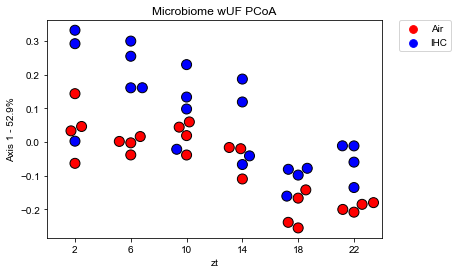

In [178]:
ax = sns.swarmplot(x="zt", y="Axis1_52.9", hue='exposure_type', palette=['red', 'blue'], 
                   data=pcoa_wUF_md, size=10, edgecolor='k', linewidth=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Microbiome wUF PCoA')
plt.ylabel('Axis 1 - 52.9%')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_wUF_pcoa_swarmplot_Ax1.svg', dpi=300, bbox_inches="tight")

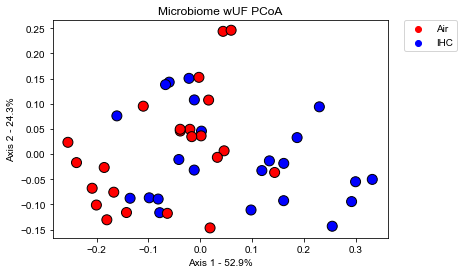

In [197]:
ax = sns.scatterplot(x="Axis1_52.9", y="Axis2_24.3", hue='exposure_type', palette=['red', 'blue'], 
                   data=pcoa_wUF_md, edgecolor='k', linewidth=1, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Microbiome wUF PCoA')
plt.ylabel('Axis 2 - 24.3%')
plt.xlabel('Axis 1 - 52.9%')
#plt.xticks(rotation=90)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_wUF_pcoa_scatterplot_Ax1p2.svg', dpi=300, bbox_inches="tight")

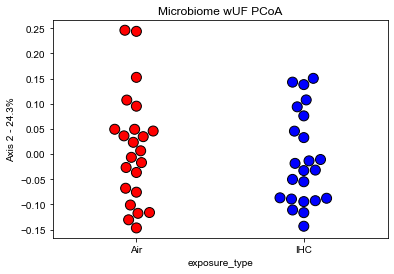

In [200]:
ax = sns.swarmplot(x="exposure_type", y="Axis2_24.3", palette=['red', 'blue'], 
                   data=pcoa_wUF_md, edgecolor='k', linewidth=1, s=10)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Microbiome wUF PCoA')
plt.ylabel('Axis 2 - 24.3%')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/cIHC_wUF_pcoa_scatterplot_Ax2.svg', dpi=300, bbox_inches="tight")